In [3]:
#Section 1 answer key Find the top 10 tweets from the dataset 

#import packages
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

##View the Pandas methods available We will use read_csv.
print(dir(pd))                                                       # Printing contents of the Pandas package

##import data in pandas dataframe object named df
df=pd.read_csv('../Resources/datasets/COVID.csv')                    #loading CSV file into Pandas dataframe

#Print attributes and methods of df we will be using sort and head
#print(dir(df))

#View the headers of the dataframe to see what is in it.
#print(df.head())                                                    # Optional: View all headers                      

# View or Create a series
#print(df['Tweet Content'])

#Sort Dataframe
sorted_data = df.sort_values(by=['Likes Received'], ascending=False) #Sorting data by most to least Likes Received
#print(sorted_data['Likes Received'])                                # Optional: View number of likes

#Create Sorted Series
most_liked_tweets = sorted_data['Tweet Content']                     #Selecting the Tweets based on the number of likes
#print(most_liked_tweets)


#The Top 10 are Please retweet....
#               Dear @DCgov
#               In the face of #COVID19
#...


['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p14', '_np_version_under1p15', '_np_version_under1p16', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_versio

In [4]:
# Categorize as Tweet, Retweets, or Replys Answer Key

#Step 1 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

#Step 2 Import Data
df=pd.read_csv('../Resources/datasets/COVID.csv')  

#Step 3 Group dataframe
name_of_dataframe_group = df.groupby(['Tweet Type'])           #group categorical data

#Step 4 #Print number of elements of each group
print(name_of_dataframe_group.size())

#Conclude that most tweets from the dataset were retweets 
#instead of actual tweeets or replys


Tweet Type
ReTweet    45291
Reply       1135
Tweet      13734
dtype: int64


Text(0.5, 0, 'Times Used')

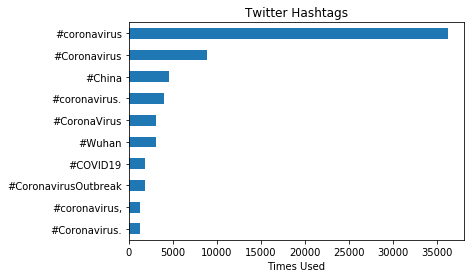

In [9]:
#Count the number of times a hastag appears 

#Step 1 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

#Step 2 Import Data
df=pd.read_csv('../Resources/datasets/COVID.csv') 

#Step 3Select Tweet Content
tweet_content = df['Tweet Content']

#Step 4 Parse for hashtags
hashtags = tweet_content.str.findall(r'#.*?(?=\s|$)').explode()

#Step 5 Get top 10 
top_10_hashtags=hashtags.value_counts().head(10)

#Make figure with pd.DataFrame.plot and Matplotlib.Pyplot
top_10_hashtags.plot.barh()
plt.gca().invert_yaxis()
plt.gca().set_title("Twitter Hashtags")
plt.gca().set_xlabel('Times Used')


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

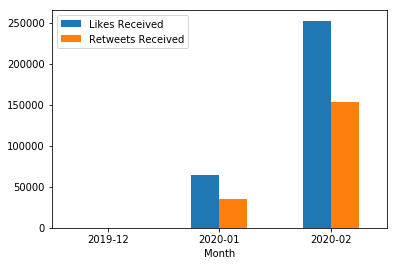

In [14]:
#Word Processing -- Tracking views with time

#Step 1 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

#Step 2 Import Data
df=pd.read_csv('../Resources/datasets/COVID.csv') 

#Step 3 Select Time & Impression Series
time_data =df['Tweet Posted Time (UTC)']


# Step 4 Create month Series
df['Month'] = pd.to_datetime(df['Tweet Posted Time (UTC)']).dt.strftime('%Y-%m')
#print(df) View new column

#sum up all the views on each date
month_totals = df.groupby(['Month']).sum()

#Step 6 Plot
month_totals.plot.bar(y=["Likes Received", "Retweets Received"])
plt.xticks(rotation=0)
#plt.gca().set_yscale('log')

0        11
1        11
2        11
3        11
4        11
         ..
60155     4
60156    21
60157    21
60158    18
60159    23
Name: Hour_EST, Length: 60160, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

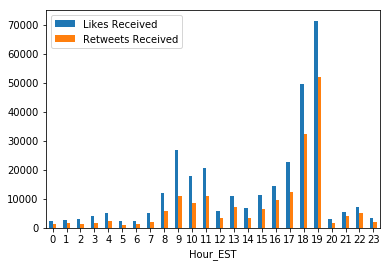

In [6]:
#Tweets likes by hour
#Word Processing -- Tracking views with time
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

#import time and view data
Path = '../Resources/datasets/'
df=pd.read_csv(Path + 'COVID.csv')
time_data =df['Tweet Posted Time (UTC)']


#Adding a new hour column
df['Hour'] = pd.to_datetime(df['Tweet Posted Time (UTC)']).dt.strftime('%H')
df['Hour_EST'] = (pd.to_numeric(df['Hour'] ) -4) % 24

#sum up all the views on each date
hour_totals = df.groupby(['Hour']).sum()
#hour_totals = df.groupby(['Hour_EST']).sum()

#Plot
hour_totals.plot.bar(y=["Likes Received", "Retweets Received"])
plt.xticks(rotation=0)